### Installation notes 

##### Prerequisites 
Python v3 \
Jupyter notebook 

##### Python packages to run the code
pip install networkx \
pip install matplotlib 

In [13]:
#gfa parser to write the gfa file to dictiory and add repeats after confirmation
#the first step in the code 
from collections import defaultdict

class gfa_parser:

    def __init__(self, gfa):
        self.gfa=gfa
        

    def gfa_parser(self, gfa):
        #reading the gfa file to a new variable
        g1=open(gfa, "r")
        nodes=[]
        edges=[]
        coverage={}
        sequences={}
        for line in g1:
            if (line.startswith("L")):
                link=line.split('\t')
                edges.append([link[1],link[3]])
            
            elif (line.startswith("S")):
                info=line.split('\t')
                seq=float(info[1])
                sequences[seq]=info[2]
                cov=info[-1].split(":")[-1]
                cov=float(cov.strip("\n"))
                if (cov>2.0):
                    coverage[info[1]]=cov
        
        #user input
        repeats=[]
        for f in repeats:
            cv=coverage.get(f)
            cv=cv-1
            temp=f
            for index in range (int(cv)):
                rename=str(f)+"r"+str(index)
                edges.append([temp,rename])
                temp=rename
                
        return(edges, coverage, sequences)

####################################################
####              Driver function               ####
####################################################
#print(x.gfa_parser("ED582/chrom1.gfa")[1])

In [14]:
# Python3 program to find the maximum depth of tree from a given node
# counts the depth of the tree from the left tree and right tree
# Python3 program to find the maximum depth of tree 
import networkx as nx
# A binary tree node 
def maxDepth (node, dfs, graph): 
    if node is None: 
        return (0)
    else : 
        # Compute the depth of each subtree 
        n=list(G.nodes())[0]
        value=list(dfs[node])
        left_tree=0
        right_tree=0
        third_tree=0
        
        if (len(value)==1):
            left=value[0]
            while (left is not None):
                try:
                    left=dfs[left][0]
                    left_tree=left_tree+1
                except KeyError:
                    break
        
        elif (len(value)==2):
            left=value[0]
            while (left is not None):
                try:
                    left=dfs[left][0]
                    left_tree=left_tree+1
                except KeyError:
                    break
                    
            right=value[1]
            while (right is not None):
                try:
                    right=dfs[right][0]
                    right_tree=right_tree+1
                except KeyError:
                    break
                    
        elif (len(value)==3):
            left=value[0]
            while (left is not None):
                try:
                    left=dfs[left][0]
                    left_tree=left_tree+1
                except KeyError:
                    break
                    
            right=value[1]
            while (right is not None):
                try:
                    right=dfs[right][0]
                    right_tree=right_tree+1
                except KeyError:
                    break
                    
            third=value[2]
            while (third is not None):
                try:
                    third=dfs[third][0]
                    third_tree=third_tree+1
                except KeyError:
                    break
                
    return (left_tree+1, right_tree+1, third_tree+1)

####################################################
####              Driver function               ####
####################################################
#input_name="ED582/chrom1.gfa"
#x=gfa_parser(input_name)
#edges=x.gfa_parser(input_name)[0]
#G=nx.Graph()
#G.add_edges_from(edges)
#n=list(G.nodes())[0]
#successors=nx.dfs_successors(G,n)
#print (successors)
#print (maxDepth('16', successors, G))

In [15]:
#if the node has two branches
# 1) check the depth of the right and the left branch
# 2) traverse through the branch that is the shortest then traverse back to the node that had two branches back to the next branch
# 3) also checks to make sure the first node remains to have only 1 neighbor
def adding_nodes_with_two_branches(key, successors, old_graph, new_graph):
    d=maxDepth(key, successors, old_graph)
    left_depth=d[0]
    right_depth=d[1]
    third_depth=d[2]
    
    #if the maximum depth to the left tree and right tree are both 1
    if (right_depth==1) and (left_depth==1) :
        new_graph=check_before_adding(key, val[0], new_graph)
        #getting the last node
        last_node=get_last_edge(new_graph)[1]
        #tracking back
        new_graph=check_before_adding(last_node, key, new_graph)
        new_graph=check_before_adding(key, val[1], new_graph)
        successors.pop(key)
                    
    #if the left depth is less than the right depth
    elif (left_depth<right_depth):    
        #print ("left depth is less than right depth", left_depth, right_depth)
        if (left_depth==1):
            new_graph=check_before_adding(key, val[0], new_graph)
            #getting the last node
            last_node=get_last_edge(new_graph)[1]
            #tracing back
            new_graph=check_before_adding(last_node, key, new_graph)
            new_graph=check_before_adding(key, val[1], new_graph)
            successors.pop(key)
        else:
            new_graph=check_before_adding(key, val[0], new_graph)
            successors[key]=[val[1]]

    #if the right depth is less than the left depth
    elif (left_depth>right_depth):
        #print ("left depth is more than right depth", left_depth, right_depth)
        if (right_depth==1):
            new_graph=check_before_adding(key, val[1], new_graph)
            #getting the last node
            last_node=get_last_edge(new_graph)[1]
            #tracing back
            new_graph=check_before_adding(last_node, key, new_graph)
            new_graph=check_before_adding(key, val[0], new_graph)
            successors.pop(key)
        else:
            new_graph=check_before_adding(key,val[1], new_graph)
            successors[key]=[val[0]]
            
    return (successors, new_graph)


In [36]:
#if the node has three branches
# 1) check the depth of the right and the left branch
# 2) traverse through the branch that is the shortest then traverse back to the node that had two branches back to the next branch
# 3) also checks to make sure the first node remains to have only 1 neighbor
def adding_nodes_with_three_branches(key, successors, old_graph, new_graph):
    d=maxDepth(key, successors, old_graph)
    left_depth=d[0]
    right_depth=d[1]
    third_depth=d[2]
    
    #get the order of the depths
    order=[left_depth, right_depth, third_depth]
    min_val=order.index(min(left_depth, right_depth, third_depth))
    max_val=order.index(max(left_depth, right_depth, third_depth))
    middle_val=order.index((left_depth + right_depth + third_depth) - (order[min_val] + order[max_val]))
    #print ("sorted order", order[min_val], order[middle_val], order[max_val])
    
    #if the maximum depth of three branches are all 1
    if (right_depth==1) and (left_depth==1) and (third_depth==1) :
        new_graph=check_before_adding(key, val[0], new_graph)
        #getting the last node
        last_node=get_last_edge(new_graph)[1]
        #tracking back
        new_graph=check_before_adding(last_node, key, new_graph)
        #adding the right node
        new_graph=check_before_adding(key, val[1], new_graph)
        last_node=get_last_edge(new_graph)[1]
        new_graph=check_before_adding(last_node, key, new_graph)
        #adding the third node
        new_graph=check_before_adding(key, val[2], new_graph)
        successors.pop(key)
        
    #checking if the min_val=0, it is the left_tree
    if (order[min_val]==left_depth):
        #if the left_tree depth is 1
        if (left_tree==1):
            new_graph=check_before_adding(key, val[0], new_graph)
            #getting the last node
            last_node=get_last_edge(new_graph)[1]
            #tracing back
            new_graph=check_before_adding(last_node, key, new_graph)
            if (order[middle_val]==right_depth):
                new_graph=check_before_adding(key, val[1], new_graph)
            else:
                new_graph=check_before_adding(key, val[2], new_graph)
            successors.pop(key)
        else:
            new_graph=check_before_adding(key, val[0], new_graph)
            successors[key]=[val[1], val[2]] 

    #if the min_val is right_tree
    elif (order[min_val]==right_depth):
        if (right_depth==1):
            new_graph=check_before_adding(key, val[1], new_graph)
            last_node=get_last_edge(new_graph)[1]
            new_graph=check_before_adding(last_node, key, new_graph)
            if (order[middle_val]==left_depth):
                new_graph=check_before_adding(key, val[0], new_graph)
            else:
                new_graph=check_before_adding(key, val[2], new_graph)
            successors.pop(key)
        else:
            new_graph=check_before_adding(key,val[1], new_graph)
            successors[key]=[val[0], val[2]]
    
    #if the min_val is the third tree
    elif (order[third_val]==third_depth):
        if (third_depth==1):
            new_graph=check_before_adding(key, val[2], new_graph)
            last_node=get_last_edge(new_graph)[1]
            new_graph=check_before_adding(last_node, key, new_graph)
            if (order[middle_val]==right_depth):
                new_graph=check_before_adding(key, val[1], new_graph)
            else:
                new_graph=check_before_adding(key, val[0], new_graph)
            successors.pop(key)
        else:
            new_graph=check_before_adding(key,val[2], new_graph)
            successors[key]=[val[0], val[1]]

    return (successors, new_graph)

In [17]:
# getting the last edge and nodes added to the new tree
def get_last_edge(new_graph):
    edges=list(new_graph.edges())
    last_edge=edges[-1]
    last_node=last_edge[1].split('_')[0]
    prev_node=last_edge[0].split('_')[0]
    return (last_edge, last_node, prev_node)

In [18]:
# this function only renames the node since it already exists in the 
#   new graph 
# assumes that the node was already checked to confirm that 
#   the node is already added to the new graph 
def rename_node(node, new_graph):
    nodes=new_graph.nodes()
    count=1
    new_node=node+"_"+str(count)
    if (new_node in nodes):
        ngbr=len(list(new_graph.neighbors(new_node)))
        if (ngbr==1):
            new_node=new_node
        elif (ngbr==2):
            count=count+1
            new_node=node+"_"+str(count)
            if (new_node in nodes):
                ngbr=len(list(new_graph.neighbors(new_node)))
                if (ngbr==2):
                    new_node=node+"_"+str(count+1)
                    
    #print (node, new_node)    
    return (new_node)

In [19]:
#before adding a  new edge, check if the nodes in the edge are 
#  1) first that the node exists or not in the new_graph 
#  2) check if the node neighbors are 2 or 1
#  3) node1 and node2 is not the first node in the graph
def check_before_adding(node1, node2,  new_graph):
    #getting the first node in the new graph
    n=list(new_graph.nodes())[0]
    
    if (node1 not in new_graph.nodes()) and (node2 not in new_graph.nodes()):
        new_graph.add_edge(node1, node2)

    elif (node1 in new_graph.nodes()) and (node2 not in new_graph.nodes()):
        n1_ngbrs=len(list(new_graph.neighbors(node1)))
        if (n1_ngbrs==1) and (node1 !=n):
            new_graph.add_edge(node1, node2)
        elif (n1_ngbrs==1) and (node1 ==n):
            x=rename_node(node1, new_graph)
            new_graph.add_edge(x, node2)
        elif (n1_ngbrs==2):
            x=rename_node(node1, new_graph)
            new_graph.add_edge(x, node2)

    elif(node1 not in new_graph.nodes()) and (node2 in new_graph.nodes()):
        n2_ngbrs=len(list(new_graph.neighbors(node2)))
        if (n2_ngbrs==1) and (node2 !=n):
            new_graph.add_edge(node1, node2)
        elif (n2_ngbrs==1) and (node2 ==n):
            x=rename_node(node2, new_graph)
            new_graph.add_edge(node1, x)
        elif (n2_ngbrs==2):
            x=rename_node(node2, new_graph)
            new_graph.add_edge(node1, x)

    elif (node1 in new_graph.nodes()) and (node2 in new_graph.nodes()):
        n1_ngbrs=len(list(new_graph.neighbors(node1)))
        n2_ngbrs=len(list(new_graph.neighbors(node2)))
        if (n1_ngbrs==1) and (n2_ngbrs==1):
            if (node1 ==n) and (node2 !=n):
                x=rename_node(node1, new_graph)
                new_graph.add_edge(x,node2)
            elif (node1 !=n) and (node2 ==n):
                x=rename_node(node2, new_graph)
                new_graph.add_edge(node1, x)
            else:
                new_graph.add_edge(node1, node2)

        elif (n1_ngbrs==2) and (n2_ngbrs==1):
            if (node2 !=n):
                x=rename_node(node1, new_graph)
                new_graph.add_edge(x, node2)
            else:
                k=rename_node(node1, new_graph)
                v=rename_node(node2, new_graph)
                new_graph.add_edge(k,v)
    
        elif (n1_ngbrs==1) and (n2_ngbrs==2):
            if (node1 !=n):
                x=rename_node(node2, new_graph)
                new_graph.add_edge(node1,x)
            else:
                k=rename_node(node1, new_graph)
                v=rename_node(node2, new_graph)
                new_graph.add_edge(k,v)
        else:
            k=rename_node(node1, new_graph)
            v=rename_node(node2, new_graph)
            new_graph.add_edge(k,v)

    return(new_graph)

In [20]:
# finding the paths from the last node to the first node and selecting the 
# shortest path
# using the dictionary to retrieve the neighbors
def path_to_first_node(last_node, first_node, old_graph):
    #getting the neighbors of the last node and working on adding the nodes to the graph accordingly
    last_node=last_node.split("_")[0]
    last_node=last_node.split("r")[0]
    nbrs=list(old_graph.neighbors(last_node))
    left_path=list(nx.shortest_path(old_graph, source=nbrs[0], target=first_node))
    right_path=list(nx.shortest_path(old_graph, source=nbrs[1], target=first_node))

    return (left_path, right_path)

In [21]:
#traversing through the two shortest paths from the last node to the key 
def shortest_path_to_first_node(left_path, right_path, new_graph):
                                
    #getting the last_node added to the new_graph 
    last_node=list(new_graph.nodes())[-1]

    #traversing the shortest path back
    if (len(left_path)==len(right_path)):
        for f in range(len(left_path)):
            if (f==0):
                new_graph=check_before_adding(last_node, left_path[f], new_graph)
            else:
                new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
                
    elif (len(left_path)<len(right_path)):
        for f in range(len(left_path)):
            if (f==0):
                new_graph=check_before_adding(last_node, left_path[f], new_graph)
            else:
                new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
                
    elif (len(left_path)>len(right_path)):
        for f in range(len(right_path)):
            if (f==0):
                new_graph=check_before_adding(last_node, right_path[f], new_graph)
            else:
                new_graph=check_before_adding(right_path[f-1], right_path[f], new_graph)
    
    return (new_graph)

In [22]:
# Writing out the complete graph as a fasta file. 
# the new complete graph is written out to "new_graph" variable, 
# but this holds only inforamtion about the node names and the sequence itself.
import re
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

def graph_to_fasta(graph, name, sequences):
    #made sure the nodes were added in the correct order
    nodes=graph.nodes()
    final_seq=""
    length=len(nodes)-1
    count=0
    for f in nodes:
        if (count<length):
            raw_node=f.split("_")[0]
            raw_node=raw_node.split("r")[0]
            #print (raw_node)
            seq=sequences[int(raw_node)]
            final_seq = final_seq+seq
            count=count+1
    final_seq=Seq(final_seq)
    
    #writing out the final seq as a record class
    final = SeqRecord(final_seq, id=name, description="putting it together")
    return (final)
    
###############################################
# Driver program
##############################################
#final=graph_to_fasta(new_graph, sequences)
#print (final.seq)

length 60
{'2': ['16'], '16': ['15'], '15': ['23'], '23': ['11'], '11': ['31'], '31': ['3'], '3': ['25'], '25': ['7', '24'], '7': ['60'], '60': ['26'], '26': ['30'], '30': ['4'], '4': ['45'], '45': ['10'], '10': ['29'], '29': ['36'], '36': ['6'], '6': ['68'], '68': ['73'], '73': ['50', '37'], '50': ['48', '71'], '71': ['14', '47'], '14': ['59'], '59': ['28', '39'], '28': ['61'], '61': ['42'], '42': ['72'], '72': ['5'], '5': ['53'], '53': ['70'], '39': ['55'], '55': ['8', '41'], '8': ['44', '33'], '44': ['69'], '69': ['58'], '58': ['12'], '12': ['80'], '80': ['18'], '18': ['32'], '32': ['74'], '74': ['46'], '46': ['75'], '75': ['67'], '67': ['64'], '64': ['63'], '63': ['43', '57'], '57': ['38'], '38': ['62'], '62': ['49'], '49': ['54'], '54': ['17'], '17': ['51', '52'], '52': ['21'], '21': ['34'], '34': ['40'], '40': ['35', '78', '82'], '35': ['56'], '56': ['66'], '82': ['77'], '47': ['76']}
key, val, count 2 ['16'] 0
[('2', '16')]
post successors= 59
key, val, count 16 ['15'] 1
[('2', 

1

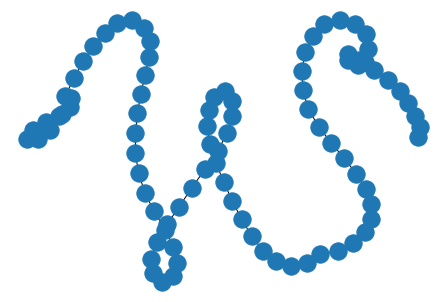

In [37]:
import matplotlib.pyplot as plt
import networkx as nx

#calling the gfa parser first to retrieve the data from gfa
#user input
input_name="ED144/chrom1.gfa"
x=gfa_parser(input_name)
edges=x.gfa_parser(input_name)[0]
coverage=x.gfa_parser(input_name)[1]
sequences=x.gfa_parser(input_name)[2]
#print (coverage)

#using networkx package to write the edges from gfa to graph
G=nx.Graph()
G.add_edges_from(edges)
#print (G.edges())
#nx.draw(G)

#getting the first node in the graph
n=list(G.nodes())[0]
#dfs traversal
successors=nx.dfs_successors(G,n)
length=len(successors)
print ("length", length)
print (successors)

#traversing the old graph to write to a new graph, traverse through each node at least once
new_graph=nx.Graph()
count=0

while (count < length):
    keys=list(successors.keys())
    key=keys[0]
    val=successors[key]
    print ("key, val, count",key, val, count)
    #print ("pre successors=", successors)
    
    #adding the first edge if there is only branch down the tree
    if (count==0) and(len(val)==1):
        new_graph.add_edge(key, val[0]) 
        count=count+1 
        successors.pop(key)
    
    #if the first node has two branches and picking the edge with the shortest depth
    elif (count==0) and (len(val)==2):
        two_branches=adding_nodes_with_two_branches(key, successors, G, new_graph)
        successors=two_branches[0]
        count=count+1 
        successors.pop(key)
    
    elif (count==0) and (len(val)==3):
        three_branches=adding_nodes_with_three_branches(key, successors, G, new_graph)
        successors=three_branches[0]
        count=count+1 
        successors.pop(key)
     
    #adding the rest of the nodes 
    elif (count!=0):
        #print ("the count is not equal to 0")
        #getting the last node
        last_node=get_last_edge(new_graph)[1]
        
        #making sure the last node is the same as the next key
        if (last_node==key):
            #if there is only one branch
            if (len(val)==1):
                new_graph=check_before_adding(key, val[0], new_graph)
                count=count+1
                successors.pop(key)
                
            #if there are two branches
            elif (len(val)==2):
                two_branches=adding_nodes_with_two_branches(key, successors, G, new_graph)
                successors=two_branches[0]
                new_graph=two_branches[1]
                count=count+1 
                
            elif (len(val)==3):
                three_branches=adding_nodes_with_three_branches(key, successors, G, new_graph)
                successors=three_branches[0]
                new_graph=three_branches[1]
                count=count+1 
        #if the last_node is not the same as the key, not in continuation 
        else:
            #finding the continuation node in the dict, if it exists 
            if (last_node in list(successors.keys())):
                val=successors[last_node]
                
                #if there is only one branch from key
                if (len(val)==1):
                    new_graph=check_before_adding(last_node, val[0], new_graph)
                    count=count+1 
                    successors.pop(last_node)
                
                #if there is more than one branch down the tree
                elif(len(val)==2):
                    two_branches=adding_nodes_with_two_branches(last_node, successors, G, new_graph)
                    successors=two_branches[0]
                    new_graph=two_branches[1]
                    count=count+1 
                    
                elif(len(val)==3):
                    two_branches=adding_nodes_with_three_branches(last_node, successors, G, new_graph)
                    successors=two_branches[0]
                    new_graph=two_branches[1]
                    count=count+1 
                
            #finding the continuation node in the dict, if it doesn't exists 
            else:
                #finding the shortest path to the key from the last node
                path=path_to_first_node(last_node, key, G)
                left_path=path[0]
                right_path=path[1]
                #print (left_path, right_path)
                new_graph=shortest_path_to_first_node(left_path, right_path, new_graph)               
                    
    #print ("count, length of keys, keys", count, len(keys), keys)
    print (new_graph.edges())
    print ("post successors=", len(successors))
    
#adding last node
last_node=get_last_edge(new_graph)[1]
last_node=last_node.split('r')[0]
path=path_to_first_node(last_node, n, G)
left_path=path[0]
right_path=path[1]
new_graph=shortest_path_to_first_node(left_path, right_path, new_graph)               
print (new_graph.edges())

#print (new_graph.edges)
nx.draw(new_graph)

# writing the graph to fasta file 
final=graph_to_fasta(new_graph, input_name, sequences)
SeqIO.write(final, "test.fasta", "fasta")

#### Notes 

The last shell may have to be changed to functions as well.. Not sure how yet in a Jupyter notebook. If changed to a code, then add argparse python package. 

Replace the first line - name="chrom1.gfa" and last line "ED252-chrom1-final.fasta". Replace the names for different files

This generated two files, one for chromosome 1 and another for chromosome 2. In bash ran the command, 
    
`cat ED144-chrom1-final.fasta ED144-chrom2-final.fasta >ED144-final.fasta`
    
   